In [1]:
from functions.get_function_setting import get_function_setting
from algorithms import ParticleSwarmOptimization
from numpy import mean, median, std, array, VisibleDeprecationWarning
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=VisibleDeprecationWarning) 

In [2]:
def main(number_iteration: int = 500, number_particle: int = 50):
    data_table = pd.DataFrame([[None, None, None, None] for _ in range(7)], columns=[
        "Average Fitness",
        "Median Fitness",
        "Average Solution",
        "Standard Deviation of Solution"
    ])

    data_table.index = ["function " + str(index+1) for index in range(7)]

    for function_number in range(1, 7+1, 1):
        function_setting = get_function_setting(function_number)
        boundaries = [function_setting["boundary"]] * function_setting["dimension"]

        best_fitnesses = []
        solutions = []
        best_fitness_sets = []
        for _ in range(50):
            particle_swarm_optimization = \
                ParticleSwarmOptimization(
                    function_setting["function"],
                    boundaries,
                    number_iteration,
                    number_particle,
                    exploration_acceleration=1.1,
                    exploitation_acceleration=1.1
                )

            particle_swarm_optimization.optimize()
            best_fitnesses.append(particle_swarm_optimization.best_fitness) # PSO best fitness
            solutions.append([particle_swarm_optimization.particles[index].position for index in range(number_particle)])
            best_fitness_sets.append(particle_swarm_optimization.best_fitness_set)
        plt.plot(mean(best_fitness_sets, axis=0))
        plt.show()

        solutions = array(solutions).reshape((-1, function_setting["dimension"]))
        
        data_table.iloc[function_number-1] = [
            mean(best_fitnesses),
            median(best_fitnesses),
            mean(solutions, axis=0),
            std(solutions, axis=0)
        ]
        # print("-" * 20)
        # print(f"Average Fitness: {data_table.iloc[function_number-1, 0]}")
        # print(f"Median Fitness: {data_table.iloc[function_number-1, 1]}")
        # print(f"Average solution: {data_table.iloc[function_number-1, 2]}")
        # print(f"Standard Deviation of solution: {data_table.iloc[function_number-1, 3]}")

    data_table.to_csv(f"./data/PSO_iteration_{number_iteration}.csv")

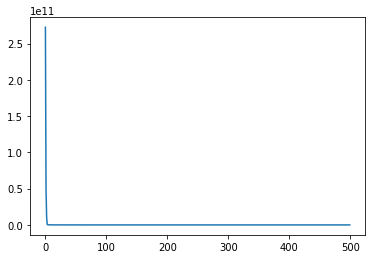

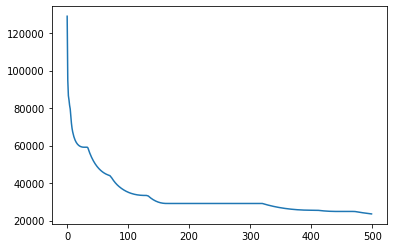

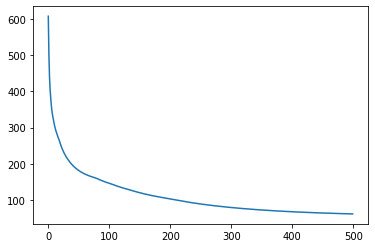

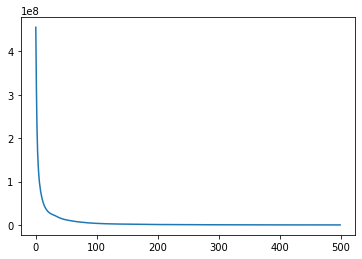

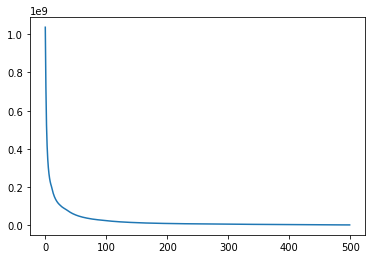

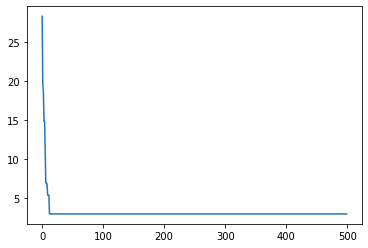

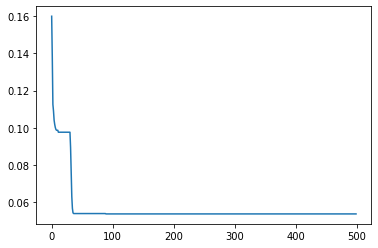

In [3]:
main(number_iteration=500, number_particle=50)

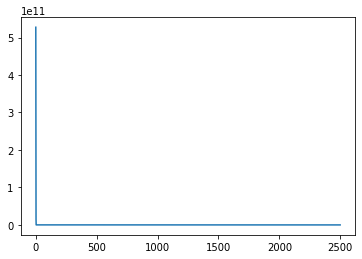

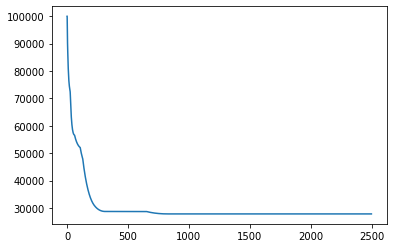

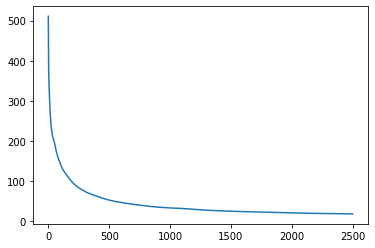

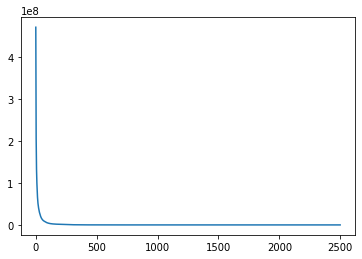

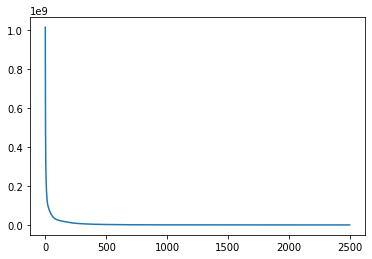

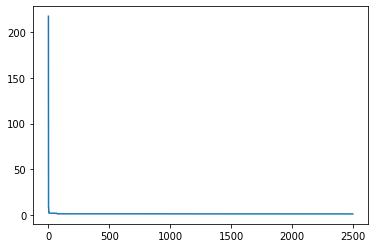

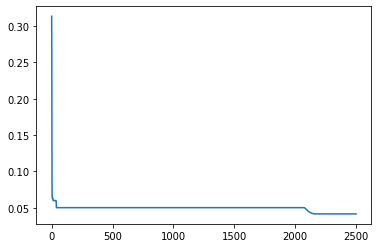

In [4]:
main(number_iteration=2500, number_particle=50)